In [78]:
import warnings
import logging
import tensorflow as tf
import pandas as pd
import numpy as np
import glob

# Ignore Python's warnings
warnings.filterwarnings('ignore')

# Ignore TensorFlow's warnings
tf.get_logger().setLevel(logging.ERROR)



In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
base_dir = 'C:\\Users\\reda-\\Desktop\\X_Ray Images'

In [4]:
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
valid_dir = os.path.join(base_dir,'valid')

In [5]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 1) 
num_classes = 13  # Number of subfolders

In [76]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
    
)

test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [7]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1543 images belonging to 13 classes.


In [77]:
# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = 32,
    class_mode='categorical',
    shuffle=False
)

Found 221 images belonging to 13 classes.


In [9]:
# Load testing data
valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size = (img_width, img_height),
    batch_size = 32,
    class_mode='categorical',
)

Found 439 images belonging to 13 classes.


In [10]:
# CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(224, 224, 3), groups=1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', groups=1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', groups=1))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Train the model

model.fit(train_generator, epochs=10, validation_data=valid_generator)


Epoch 1/10
49/49 [==============================] - 38s 751ms/step - loss: 1.9004 - accuracy: 0.4666 - val_loss: 1.2709 - val_accuracy: 0.6036
Epoch 2/10
49/49 [==============================] - 36s 727ms/step - loss: 1.2040 - accuracy: 0.6487 - val_loss: 0.9085 - val_accuracy: 0.7312
Epoch 3/10
49/49 [==============================] - 36s 728ms/step - loss: 1.0427 - accuracy: 0.6896 - val_loss: 0.8454 - val_accuracy: 0.7631
Epoch 4/10
49/49 [==============================] - 38s 764ms/step - loss: 0.9247 - accuracy: 0.7278 - val_loss: 0.7511 - val_accuracy: 0.7904
Epoch 5/10
49/49 [==============================] - 38s 767ms/step - loss: 0.8812 - accuracy: 0.7440 - val_loss: 0.7837 - val_accuracy: 0.7927
Epoch 6/10
49/49 [==============================] - 59s 1s/step - loss: 0.7451 - accuracy: 0.7764 - val_loss: 0.7792 - val_accuracy: 0.7631
Epoch 7/10
49/49 [==============================] - 58s 1s/step - loss: 0.7094 - accuracy: 0.7907 - val_loss: 0.7503 - val_accuracy: 0.7745
Epoch

In [46]:
accuracy = model.evaluate(test_generator)
print("Accuracy on test set: {:.2f}%".format(accuracy[1] * 100))

7/7 [==============================] - 1s 128ms/step - loss: 0.7342 - accuracy: 0.7602
Accuracy on test set: 76.02%


In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils

In [28]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

In [85]:
class_labels = ["bassin","cheville","colonne_vertebrale", "cou", "coude", "epaule", "genou", "jambe", "main", "pectoral poitrine", "pied", "poignet", "tete"]


In [88]:
def show_image_with_prediction(image_path, predicted_body_part):
    display(Image(filename=image_path, width=600))


7/7 [==============================] - 1s 144ms/step
Chemin : C:\Users\reda-\Desktop\X_Ray Images\test\colonne_vertebrale\1-2-826-0-1-3680043-8-498-59113893969561724980199447804671753951-c_png_jpg.rf.ce19b992402e72e0d70a9ef9f1014243.jpg
Vraie étiquette : colonne_vertebrale
Prédiction du modèle : colonne_vertebrale
Confiance du modèle : 99.02%



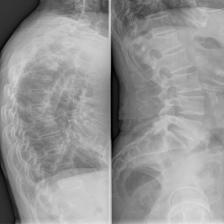

In [94]:




# Faites des prédictions pour chaque lot d'images
predictions = model.predict(test_generator)

# Obtenez les indices de classe prédits pour chaque image
predicted_class_indices = np.argmax(predictions, axis=1)

# Obtenez les noms de classe correspondant aux indices
predicted_class_labels = [class_labels[i] for i in predicted_class_indices]

# Obtenez les pourcentages de confiance du modèle pour chaque prédiction
confidence_percentages = np.max(predictions, axis=1) * 100

# Créez un dataframe pour stocker les informations
df_results = pd.DataFrame({
    'Image': test_generator.filepaths,
    'Vraie étiquette': [class_labels[i] for i in test_generator.classes],
    'Prédiction du modèle': predicted_class_labels,
    'Confiance (%)': confidence_percentages
})

# Sélectionnez une seule image aléatoire
random_row = df_results.sample()

# Affichez l'image avec ses prédictions et pourcentage de confiance
image_path = random_row['Image'].values[0]
predicted_label = random_row['Prédiction du modèle'].values[0]
confidence_percentage = random_row['Confiance (%)'].values[0]

print(f"Chemin : {image_path}")
print(f"Vraie étiquette : {random_row['Vraie étiquette'].values[0]}")
print(f"Prédiction du modèle : {predicted_label}")
print(f"Confiance du modèle : {confidence_percentage:.2f}%\n")
show_image_with_prediction(image_path, predicted_label)
